In [1]:
import tensorflow as tf
from tensorflow import keras

import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [17]:
data_dir = pathlib.Path("/Users/userfolder/faculdade/slime-ia/Dados")

In [18]:
# Defina o diretório que você deseja verificar
mangas = pathlib.Path("/Users/userfolder/faculdade/slime-ia/Dados/manga")

# Use o método glob() para listar todos os arquivos no diretório
arquivos_na_pasta = list(mangas.glob("*.png"))
arquivos_na_pasta2 = list(mangas.glob("*.jpg"))
arquivos_na_pasta3 = list(mangas.glob("*.jpeg"))

# Use a função len() para contar o número de arquivos
numero_de_arquivos = len(arquivos_na_pasta) + len(arquivos_na_pasta2) + len(arquivos_na_pasta3)

# Exiba o número de arquivos
print(f"Número de mangas na pasta: {numero_de_arquivos}")

# Defina o diretório que você deseja verificar
mangas = pathlib.Path("/Users/userfolder/faculdade/slime-ia/Dados/novels")

# Use o método glob() para listar todos os arquivos no diretório
arquivos_na_pasta = list(mangas.glob("*.png"))
arquivos_na_pasta2 = list(mangas.glob("*.jpg"))
arquivos_na_pasta3 = list(mangas.glob("*.jpeg"))

# Use a função len() para contar o número de arquivos
numero_de_arquivos = len(arquivos_na_pasta) + len(arquivos_na_pasta2) + len(arquivos_na_pasta3)

# Exiba o número de arquivos
print(f"Número de novels na pasta: {numero_de_arquivos}")

# Defina o diretório que você deseja verificar
mangas = pathlib.Path("/Users/userfolder/faculdade/slime-ia/Dados/manhua")

# Use o método glob() para listar todos os arquivos no diretório
arquivos_na_pasta = list(mangas.glob("*.png"))
arquivos_na_pasta2 = list(mangas.glob("*.jpg"))
arquivos_na_pasta3 = list(mangas.glob("*.jpeg"))

# Use a função len() para contar o número de arquivos
numero_de_arquivos = len(arquivos_na_pasta) + len(arquivos_na_pasta2) + len(arquivos_na_pasta3)

# Exiba o número de arquivos
print(f"Número de manhuas na pasta: {numero_de_arquivos}")

# Defina o diretório que você deseja verificar
mangas = pathlib.Path("/Users/userfolder/faculdade/slime-ia/Dados/webcomic")

# Use o método glob() para listar todos os arquivos no diretório
arquivos_na_pasta = list(mangas.glob("*.png"))
arquivos_na_pasta2 = list(mangas.glob("*.jpg"))
arquivos_na_pasta3 = list(mangas.glob("*.jpeg"))

# Use a função len() para contar o número de arquivos
numero_de_arquivos = len(arquivos_na_pasta) + len(arquivos_na_pasta2) + len(arquivos_na_pasta3)

# Exiba o número de arquivos
print(f"Número de webcomic na pasta: {numero_de_arquivos}")

Número de mangas na pasta: 122
Número de novels na pasta: 115
Número de manhuas na pasta: 579
Número de webcomic na pasta: 102


In [19]:
img_height = 700
img_width = 500
batch_size = 32

In [20]:
dataset_treino = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="training",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 918 files belonging to 4 classes.
Using 735 files for training.


In [21]:
dataset_validacao = keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split = 0.2,
    subset="validation",
    seed=42,
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 918 files belonging to 4 classes.
Using 183 files for validation.


In [22]:
class_names = dataset_treino.class_names
print(class_names)

['manga', 'manhua', 'novels', 'webcomic']


In [23]:
num_classes = len(class_names)
print(num_classes)

4


In [24]:
## antes, ta dando overfitting
model = keras.models.Sequential([
  keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.2),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(num_classes, activation = 'softmax')
])

In [31]:
model = keras.models.Sequential([
    keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    
    # Camadas de convolução
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    
    # Camada de regularização Dropout
    keras.layers.Dropout(0.3),
    
    # Camada Flatten para preparar a entrada para a rede neural densa
    keras.layers.Flatten(),
    
    # Camadas Densas
    keras.layers.Dense(256, activation='relu'),
    
    # Camada de saída com ativação softmax para classificação multiclasses
    keras.layers.Dense(num_classes, activation='softmax')
])

In [32]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [33]:
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 700, 500, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 700, 500, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 350, 250, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 350, 250, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 175, 125, 64)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 175, 125, 128)    

In [34]:
epochs = 9
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("com_imagens_maioresv3.h5", 
                             )  # Optionally, you can use other options like 'save_weights_only'

history = model.fit(
    dataset_treino,
    validation_data=dataset_validacao,
    epochs=epochs,
    callbacks=[checkpoint]  # Pass the checkpoint callback here
)

Epoch 1/9
23/23 [==============================] - ETA: 0s - loss: 12.0615 - accuracy: 0.5156

/Users/aroldogoulartbarros/miniforge3/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


23/23 [==============================] - 241s 10s/step - loss: 12.0615 - accuracy: 0.5156 - val_loss: 0.7735 - val_accuracy: 0.6940
Epoch 2/9
23/23 [==============================] - 219s 9s/step - loss: 0.5287 - accuracy: 0.8286 - val_loss: 0.3873 - val_accuracy: 0.8743
Epoch 3/9
23/23 [==============================] - 216s 9s/step - loss: 0.1913 - accuracy: 0.9306 - val_loss: 0.2273 - val_accuracy: 0.9235
Epoch 4/9
23/23 [==============================] - 230s 10s/step - loss: 0.0833 - accuracy: 0.9714 - val_loss: 0.1329 - val_accuracy: 0.9563
Epoch 5/9
23/23 [==============================] - 251s 11s/step - loss: 0.0291 - accuracy: 0.9918 - val_loss: 0.1581 - val_accuracy: 0.9617
Epoch 6/9
23/23 [==============================] - 264s 11s/step - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.1486 - val_accuracy: 0.9563
Epoch 7/9
23/23 [==============================] - 238s 10s/step - loss: 0.0108 - accuracy: 0.9986 - val_loss: 0.1306 - val_accuracy: 0.9617
Epoch 8/9
23/23 [=======

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

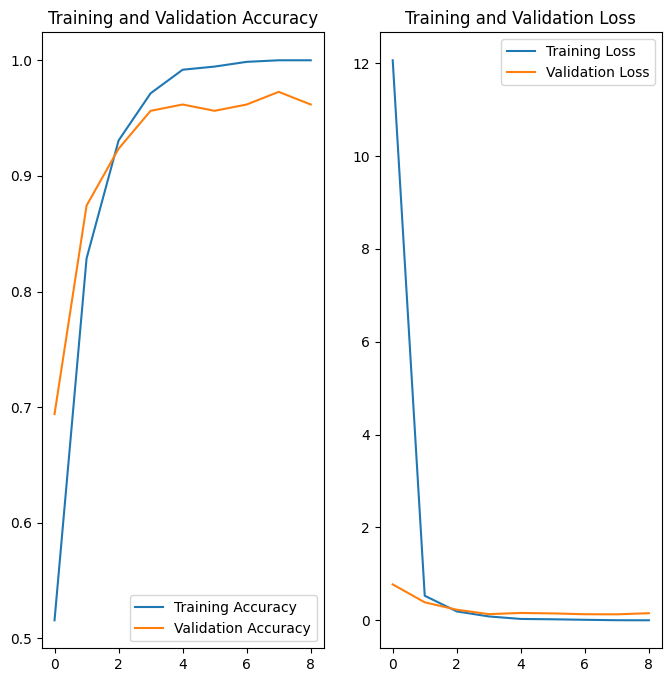

In [36]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()